In [3]:
# Import Libraries
# For data visualisation
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

# For feature engineering ans selection 
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2  #feature selection for classification
from sklearn.metrics import recall_score    #to measure model performance

# Machine learning model selection and implementation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


# Importing classification metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import make_scorer, recall_score, f1_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
url = "https://docs.google.com/spreadsheets/d/1rK1CLqpsd6JfSBLk9nRE-f0NzDc9lEXgxZ-cKjxIN_s/export?format=csv"
df = pd.read_csv(url)

In [5]:
df.head()


,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [6]:
print(f"Lead Scoring Dataset: Rows= {df.shape[0]}, Columns= {df.shape[1]}")


Lead Scoring Dataset: Rows= 46608, Columns= 16


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46608 entries, 0 to 46607
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      46608 non-null  int64 
 1   Agent_id        46608 non-null  object
 2   status          46608 non-null  object
 3   lost_reason     43244 non-null  object
 4   budget          42908 non-null  object
 5   lease           44267 non-null  object
 6   movein          32970 non-null  object
 7   source          46608 non-null  object
 8   source_city     46608 non-null  object
 9   source_country  46608 non-null  object
 10  utm_source      46608 non-null  object
 11  utm_medium      46608 non-null  object
 12  des_city        46608 non-null  object
 13  des_country     46608 non-null  object
 14  room_type       23061 non-null  object
 15  lead_id         46608 non-null  object
dtypes: int64(1), object(15)
memory usage: 5.7+ MB


In [8]:
print(f"The total number of duplicated observations in the dataset: {df.duplicated().sum()}")


The total number of duplicated observations in the dataset: 0


In [9]:
df.drop_duplicates(keep='first',inplace=True)


In [10]:
print(f"The total number of duplicated observations in the dataset: {df.duplicated().sum()}")


The total number of duplicated observations in the dataset: 0


In [11]:
for i in df.columns:
  df[i].replace(to_replace={"9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0":np.nan}, inplace=True)

In [12]:

# Missing Values/Null Values Count
print("-"*50)
print("Null value count in each of the variable: ")
print("-"*50)
print(df.isna().sum())
print("-"*50)

# Percentage of null values in each category
print("Percentage of null values in each variable: ")
print("-"*50)
null_count_by_variable = df.isnull().sum()/len(df)
print(f"{null_count_by_variable*100}%")
print("-"*50)
     

--------------------------------------------------
Null value count in each of the variable: 
--------------------------------------------------
Unnamed: 0            0
Agent_id              0
status                0
lost_reason        3364
budget             3700
lease              2341
movein            13638
source             5977
source_city        8851
source_country     8641
utm_source           61
utm_medium         3187
des_city           2537
des_country        2537
room_type         23547
lead_id               0
dtype: int64
--------------------------------------------------
Percentage of null values in each variable: 
--------------------------------------------------
Unnamed: 0         0.000000
Agent_id           0.000000
status             0.000000
lost_reason        7.217645
budget             7.938551
lease              5.022743
movein            29.261071
source            12.823979
source_city       18.990302
source_country    18.539736
utm_source         0.130879
utm

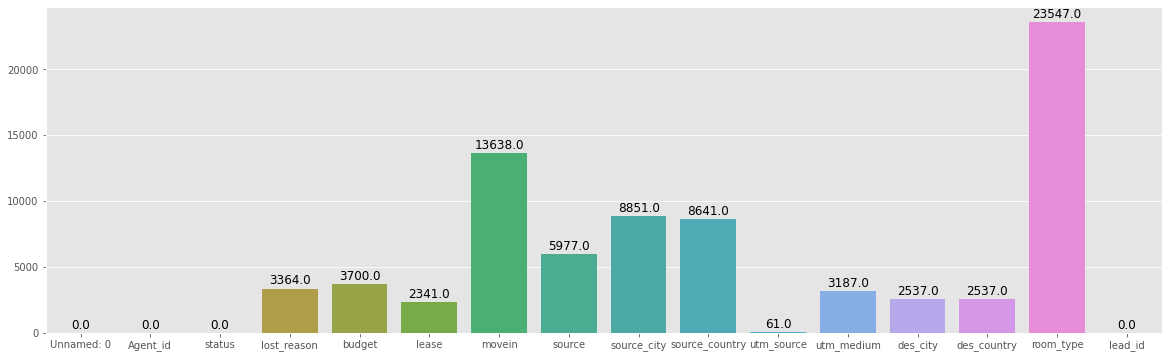

In [13]:
plt.figure(figsize=(20,6))
plots= sns.barplot(x=df.columns,y=df.isna().sum())

for bar in plots.patches:
      plots.annotate(bar.get_height(),
                     (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                     size=12, xytext=(0, 8),
                     textcoords='offset points')
plt.show()

In [14]:
print(f"Available columns:\n{df.columns.to_list()}")


Available columns:
['Unnamed: 0', 'Agent_id', 'status', 'lost_reason', 'budget', 'lease', 'movein', 'source', 'source_city', 'source_country', 'utm_source', 'utm_medium', 'des_city', 'des_country', 'room_type', 'lead_id']


In [15]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,46608.0,23303.5,13454.71501,0.0,11651.75,23303.5,34955.25,46607.0


In [16]:
print(f"The number of unique values in: ")
print("-"*35)
for i in df.columns:
  print(f"'{i}' : {df[i].nunique()}")

The number of unique values in: 
-----------------------------------
'Unnamed: 0' : 46608
'Agent_id' : 120
'status' : 6
'lost_reason' : 30
'budget' : 1857
'lease' : 311
'movein' : 477
'source' : 682
'source_city' : 4335
'source_country' : 185
'utm_source' : 34
'utm_medium' : 63
'des_city' : 219
'des_country' : 14
'room_type' : 5
'lead_id' : 30574


In [17]:
df_new= df[(df['status']== 'WON') | (df['status']=='LOST')]

# Checking shape
print(f"Before: {df.shape}")
print(f'After: {df_new.shape}')

Before: (46608, 16)
After: (46317, 16)


In [18]:
print("-"*50)
print("Null value count in each of the variable: ")
print("-"*50)
print(df_new.isna().sum())
print("-"*50)

# Percentage of null values in each category
print("Percentage of null values in each variable: ")
print("-"*50)
null_count_by_variable = df_new.isnull().sum()/len(df)
print(f"{null_count_by_variable*100}%")
print("-"*50)

--------------------------------------------------
Null value count in each of the variable: 
--------------------------------------------------
Unnamed: 0            0
Agent_id              0
status                0
lost_reason        3073
budget             3694
lease              2336
movein            13610
source             5951
source_city        8831
source_country     8622
utm_source           61
utm_medium         3184
des_city           2529
des_country        2529
room_type         23491
lead_id               0
dtype: int64
--------------------------------------------------
Percentage of null values in each variable: 
--------------------------------------------------
Unnamed: 0         0.000000
Agent_id           0.000000
status             0.000000
lost_reason        6.593289
budget             7.925678
lease              5.012015
movein            29.200996
source            12.768194
source_city       18.947391
source_country    18.498970
utm_source         0.130879
utm

In [19]:

print(df_new["lost_reason"].value_counts()[0]*100/df_new['lost_reason'].shape[0])
print(df_new["budget"].value_counts()[0]*100/df_new['budget'].shape[0])
print(df_new["lease"].value_counts()[0]*100/df_new['lease'].shape[0])
print(df_new["utm_source"].value_counts()[0]*100/df_new['utm_source'].shape[0])
print(df_new["utm_medium"].value_counts()[0]*100/df_new['utm_medium'].shape[0])
print(df_new["des_city"].value_counts()[0]*100/df_new['des_city'].shape[0])
print(df_new["des_country"].value_counts()[0]*100/df_new['des_country'].shape[0])

19.19813459420947
21.05058617786126
23.749379277587064
66.65587149426776
68.01390418204979
15.810609495433642
91.5236306323812


In [20]:

print(df_new["movein"].value_counts()[0]*100/df_new['movein'].shape[0])
print(df_new["source"].value_counts()[0]*100/df_new['source'].shape[0])
print(df_new["source_city"].value_counts()[0]*100/df_new['source_city'].shape[0])
print(df_new["source_country"].value_counts()[0]*100/df_new['source_country'].shape[0])

5.289634475462573
41.220286287972016
6.520284128937539
40.30269663406525


In [21]:

for i in df_new.columns:
  print(df_new[i].value_counts())

0        1
31049    1
31051    1
31052    1
31053    1
        ..
15527    1
15528    1
15529    1
15530    1
46607    1
Name: Unnamed: 0, Length: 46317, dtype: int64
2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e    8186
96ab6152cb421b4d4012a4903c19004608a342a5f7c6671a7828b8ad8d5b9489    1451
44864c96fa1c36602f0d045b268981b6cab638a60fc207c89e3bba235f619450    1279
fb3e2c0015ad5bcd60d7619ca575a56c15c5d2cd3f01f18e68c4dfaeee585db5    1105
eac9815a500f908736d303e23aa227f0957177b0e6756b915a3d3cc3a846b83b    1069
                                                                    ... 
e16d12cd21f38bc8253f65cc5c0bf4932cf1397ba1c60682b2a99049e0e7ceed       1
04222ea3e14cb1209b9726defe3efce5196b7afa0a959854a30401be41f4026d       1
fb87e6cf60af08595bd9fcf1f006a12f1338cb4480acea383b3b65da10bb9f28       1
c904d4c3485db6569c9deb41da845d82056e8843eafba8bc8a90aaa06df96963       1
59e19706d51d39f66711c2653cd7eb1291c94d9b55eb14bda74ce4dc636d015a       1
Name: Agent_id, Length: 120, d

In [22]:

df_new.shape[0]/2

23158.5

In [23]:
df_new['movein'].value_counts()


10/09/22    2450
31/08/22    2187
01/09/22    2118
09/09/22    1563
17/09/22    1422
            ... 
26/04/23       1
10/06/23       1
05/01/24       1
06/09/06       1
06/06/23       1
Name: movein, Length: 469, dtype: int64

In [24]:
df_new['room_type'].value_counts()


Ensuite         12379
Studio           6316
Entire Place     4128
Non-Ensuite         2
Twin-Studio         1
Name: room_type, dtype: int64

In [25]:
df_new.head()

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,NaN,NaN,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


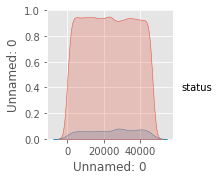

In [27]:
sns.pairplot(df_new, hue="status")

In [28]:
column = df_new.columns

In [29]:
column

Index(['Unnamed: 0', 'Agent_id', 'status', 'lost_reason', 'budget', 'lease',
       'movein', 'source', 'source_city', 'source_country', 'utm_source',
       'utm_medium', 'des_city', 'des_country', 'room_type', 'lead_id'],
      dtype='object')

In [30]:
y = df_new[['status']]

In [31]:
column = column.drop('status') 

In [32]:
X = df_new[column]

In [33]:
X.head()


,Unnamed: 0,Agent_id,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,Not responding,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,Low budget,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,Junk lead,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,NaN,NaN,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [34]:
cat_cols = ["Agent_id", "lost_reason", "budget", "lease", "movein", "source", "source_city", "source_country", "utm_source", "utm_medium", "des_city", "des_country", "room_type", "lead_id"]

In [35]:
x = pd.get_dummies(X,columns=cat_cols)

In [36]:
x.head()

,Unnamed: 0,Agent_id_04222ea3e14cb1209b9726defe3efce5196b7afa0a959854a30401be41f4026d,Agent_id_04d19fde0a08b17aca69491e714bea43565384d12a63626e08477662cc03780e,Agent_id_06ae80c3e00a1457fc70192d357766c9de0a9787fe3dedc386ac0191e9c151c3,Agent_id_0a8e1918dfba7f1923f23bc135c7b0a76344b632c54ca1584c9938160705f63e,Agent_id_0b31c0155c83c5fdbff532bfe3e43dfe547938df26dd9092df0eb46bd7900b0c,Agent_id_1134c0a7d44fdae1afd7f1f64e2789496784095ca0a050947d659c256d331d34,Agent_id_131127203c89e8219dbdfe2f597538759310f40918b22270401794e1300d2c9d,Agent_id_13990937ab8ca4413751a9012a31255e72a18ba3ac8d5c83dd511df50cf2a3e1,Agent_id_15aefc83749af078486ccde85b7f17f9b40fec0bce7612b1a75910868f7aad2e,...,lead_id_ffdf7224ddda79b25424aa96d087f561bca9c2beaffded7d889780704986663b,lead_id_ffe0d0636acff00ee56039003a7e4f07d50db587e1657a0328158be6a5ef854f,lead_id_ffe7aa8f7a4146e31383bbfab9b3246a1921ec1417fb847ca1727bac63e62cb2,lead_id_ffe875a826760c8d01014455fb1ee899e1bfbb1dee73dd5ff6b9eb15859f4490,lead_id_ffe9d2384b33d1843f8e9042cdbaed7528aa75ef5b22c824ab3756fd3fb7ee4e,lead_id_fff11aaa4800ce35804a1e557f5ea04d4b7575e31f530398413a1dd111af6216,lead_id_fff4419ebda9a75ffbbd4039fef31eeaeca93b4c7d6aab586641f71344f71ac1,lead_id_fffdb3c33726791642822022e13ea17b16ddd67312c9abbaa579d80f29cacf92,lead_id_fffe7b465509541da84061c144ca3426748df13497a366adf908eb31adf56119,lead_id_ffff1f313fa1a2a4d6ec6e33bcd9c71be5ed24294c3ed3850efdbea1519d5a6c
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
import sklearn

In [38]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
X['Agent_id'] = le.fit_transform(X['Agent_id'])

In [39]:
X['Agent_id']

0         12
1         20
2         87
3        110
4         12
        ... 
46603     15
46604     24
46605      5
46606     60
46607     13
Name: Agent_id, Length: 46317, dtype: int64

In [40]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
X['lost_reason'] = le.fit_transform(X['lost_reason'])

In [41]:
X['lost_reason']

0        21
1        16
2        21
3        16
4         8
         ..
46603    15
46604    24
46605    15
46606    15
46607    15
Name: lost_reason, Length: 46317, dtype: int64

In [42]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
X['budget'] = le.fit_transform(X['budget'])

In [43]:
X['budget']

0        1851
1        1851
2        1752
3          10
4        1851
         ... 
46603    1834
46604    1834
46605    1810
46606     815
46607    1793
Name: budget, Length: 46317, dtype: int64

In [44]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
X['lease'] = le.fit_transform(X['lease'])

In [45]:
X['lease']

0        311
1        311
2        266
3          2
4        311
        ... 
46603    263
46604    286
46605    266
46606     93
46607    266
Name: lease, Length: 46317, dtype: int64

In [46]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
X['movein'] = le.fit_transform(X['movein'])

In [47]:
X['movein']

0        469
1        469
2        463
3        469
4        469
        ... 
46603     19
46604    431
46605    308
46606    449
46607     19
Name: movein, Length: 46317, dtype: int64

In [48]:
#"source", "source_city", "source_country", "utm_source", "utm_medium", "des_city", "des_country", "room_type", "lead_id"

In [49]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
X['source'] = le.fit_transform(X['source'])

In [50]:
X['source']

0        682
1        682
2        343
3        507
4        682
        ... 
46603    682
46604    682
46605    343
46606    578
46607    343
Name: source, Length: 46317, dtype: int64

In [51]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
X['source_city'] = le.fit_transform(X['source_city'])

In [52]:
X['source_city']

0        4315
1        4315
2        2619
3        2817
4        4315
         ... 
46603    2125
46604    2695
46605    2125
46606    3943
46607     351
Name: source_city, Length: 46317, dtype: int64

In [53]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
X['source_country'] = le.fit_transform(X['source_country'])

In [54]:
X['source_country']

0        184
1        184
2        165
3        165
4        184
        ... 
46603    100
46604    100
46605    100
46606    133
46607    165
Name: source_country, Length: 46317, dtype: int64

In [55]:
#"utm_source", "utm_medium", "des_city", "des_country", "room_type", "lead_id"

In [56]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
X['utm_source'] = le.fit_transform(X['utm_source'])

In [57]:
X['utm_source']

0         5
1         5
2        25
3        25
4         5
         ..
46603    25
46604    25
46605    25
46606    19
46607    25
Name: utm_source, Length: 46317, dtype: int64

In [58]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
X['utm_medium'] = le.fit_transform(X['utm_medium'])

In [59]:
X['utm_medium']

0        10
1        10
2         3
3         3
4        10
         ..
46603     3
46604     3
46605     3
46606    49
46607     3
Name: utm_medium, Length: 46317, dtype: int64

In [60]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
X['des_city'] = le.fit_transform(X['des_city'])

In [62]:
X['des_city']

0        205
1         74
2         18
3         26
4        219
        ... 
46603     22
46604    135
46605    205
46606    205
46607     85
Name: des_city, Length: 46317, dtype: int64

In [63]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
X['des_country'] = le.fit_transform(X['des_country'])

In [64]:
X['des_country']

0         8
1         8
2         8
3         8
4        14
         ..
46603     8
46604     8
46605     8
46606     8
46607     8
Name: des_country, Length: 46317, dtype: int64

In [65]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
X['room_type'] = le.fit_transform(X['room_type'])

In [66]:
X['room_type']

0        5
1        5
2        0
3        5
4        5
        ..
46603    3
46604    3
46605    3
46606    5
46607    3
Name: room_type, Length: 46317, dtype: int64

In [67]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
X['lead_id'] = le.fit_transform(X['lead_id'])

In [68]:
X['lead_id']

0        24421
1        22037
2        17924
3         3582
4        30016
         ...  
46603     3295
46604     3895
46605    25937
46606     3895
46607    13961
Name: lead_id, Length: 46317, dtype: int64

In [69]:
X

,Unnamed: 0,Agent_id,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,12,21,1851,311,469,682,4315,184,5,10,205,8,5,24421
1,1,20,16,1851,311,469,682,4315,184,5,10,74,8,5,22037
2,2,87,21,1752,266,463,343,2619,165,25,3,18,8,0,17924
3,3,110,16,10,2,469,507,2817,165,25,3,26,8,5,3582
4,4,12,8,1851,311,469,682,4315,184,5,10,219,14,5,30016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46603,46603,15,15,1834,263,19,682,2125,100,25,3,22,8,3,3295
46604,46604,24,24,1834,286,431,682,2695,100,25,3,135,8,3,3895
46605,46605,5,15,1810,266,308,343,2125,100,25,3,205,8,3,25937
46606,46606,60,15,815,93,449,578,3943,133,19,49,205,8,5,3895


In [70]:
y

,status
0,LOST
1,LOST
2,LOST
3,LOST
4,LOST
...,...
46603,LOST
46604,LOST
46605,LOST
46606,LOST


In [71]:
cat_cols = ["status"]

In [73]:
Y = pd.get_dummies(y,columns=cat_cols)

In [74]:
Y.head()

,status_LOST,status_WON
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [75]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
y['status'] = le.fit_transform(y['status'])

In [76]:
y['status']

0        0
1        0
2        0
3        0
4        0
        ..
46603    0
46604    0
46605    0
46606    0
46607    0
Name: status, Length: 46317, dtype: int64

In [77]:
X = X.values

In [78]:
y = y.values

In [79]:
split = int(0.8*X.shape[0])
print(split)

X_train = X[:split,:]
y_train = y[:split]

X_test = X[split:,:]
y_test = y[split:]

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
split

37053
(37053, 15) (37053, 1)
(9264, 15) (9264, 1)


37053

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.24773163009888577

In [82]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_train, y_train)

KNeighborsRegressor()

In [83]:
neigh.score(X_test,y_test)

-0.17129367359633063

In [86]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [87]:
regressor.score(X_test,y_test)

1.0

In [88]:
import time

In [89]:
from sklearn.ensemble import RandomForestRegressor
l1 = []
l2 = []
for i in range(2,15):
    start = time.time()
    regr = RandomForestRegressor(max_depth=i, random_state=0)
    regr.fit(X_train, y_train)
    end = time.time()
    l1.append(regr.score(X_test, y_test))
    l2.append(end-start)

In [90]:
print(l1)
print(l2)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.677595615386963, 1.683474063873291, 1.8522288799285889, 1.955554485321045, 1.9183123111724854, 1.8223209381103516, 1.9482612609863281, 1.9803180694580078, 1.953490972518921, 2.071791648864746, 1.880763292312622, 1.779085397720337, 1.6117157936096191]


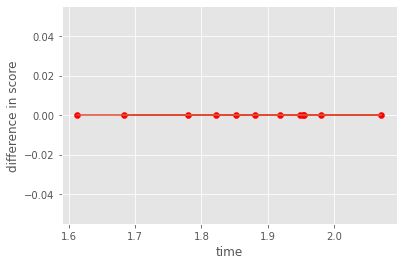

In [91]:
l3 = []
for i in range(1,len(l1)):
    l3.append(l1[i] - l1[i-1])
plt.scatter(l2[1:], l3, color = 'red')
plt.plot(l2[1:],l3)
plt.xlabel('time')
plt.ylabel('difference in score')
plt.show()

In [92]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=500)
regr.fit(X_train, y_train)

MLPRegressor(max_iter=500, random_state=1)

In [93]:
regr.score(X_train, y_train)

-870.5273634193458

In [94]:
regr.score(X_test, y_test)

-2320.9669375171507